# Research of ads for the sale of apartments

The data provider is Yandex.Realty.
The data format is an archive of ads for the sale of apartments in a large Russian city and neighboring settlements for several years.

Objective: to learn how to determine the market value of real estate. And determine the parameters that affect the price.

The results of the study will allow to build an automated system: it will track down anomalies and perform anti-fraud.

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the center, airport, nearest park and reservoir.

The objective of this project is to study the real estate market.

You can achieve the goal in three steps:

    1) Preprocessing the data;
    2) Add the necessary parameters for analysis;
    3) Conduct a study.

### Data Downloading

####  Files open

In [71]:
import pandas as pd
import numpy as np

from collections import Counter 
from itertools import chain 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv(r'C:\Users\Grine\Desktop\GitHub\estate_market_analyze-10.2022\real_estate_data.csv', sep='\t') 

In [18]:
data['locality_name']

0            Санкт-Петербург
1             посёлок Шушары
2            Санкт-Петербург
3            Санкт-Петербург
4            Санкт-Петербург
                ...         
23694        Санкт-Петербург
23695                  Тосно
23696       село Рождествено
23697        Санкт-Петербург
23698    поселок Новый Учхоз
Name: locality_name, Length: 23699, dtype: object

#### Initial examination of the data

In [19]:
df = data.copy()
print(f'Amount of duplicates in the dataframe: {df.duplicated().sum()}') 

Amount of duplicates in the dataframe: 0


In [20]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


*Many columns have missing values. It is necessary to study the information in more detail:*

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

- It is necessary to pre-process the omissions;
- The first_day_exposition column will need to be converted to a date;

But before that, let's see how our variables are distributed:

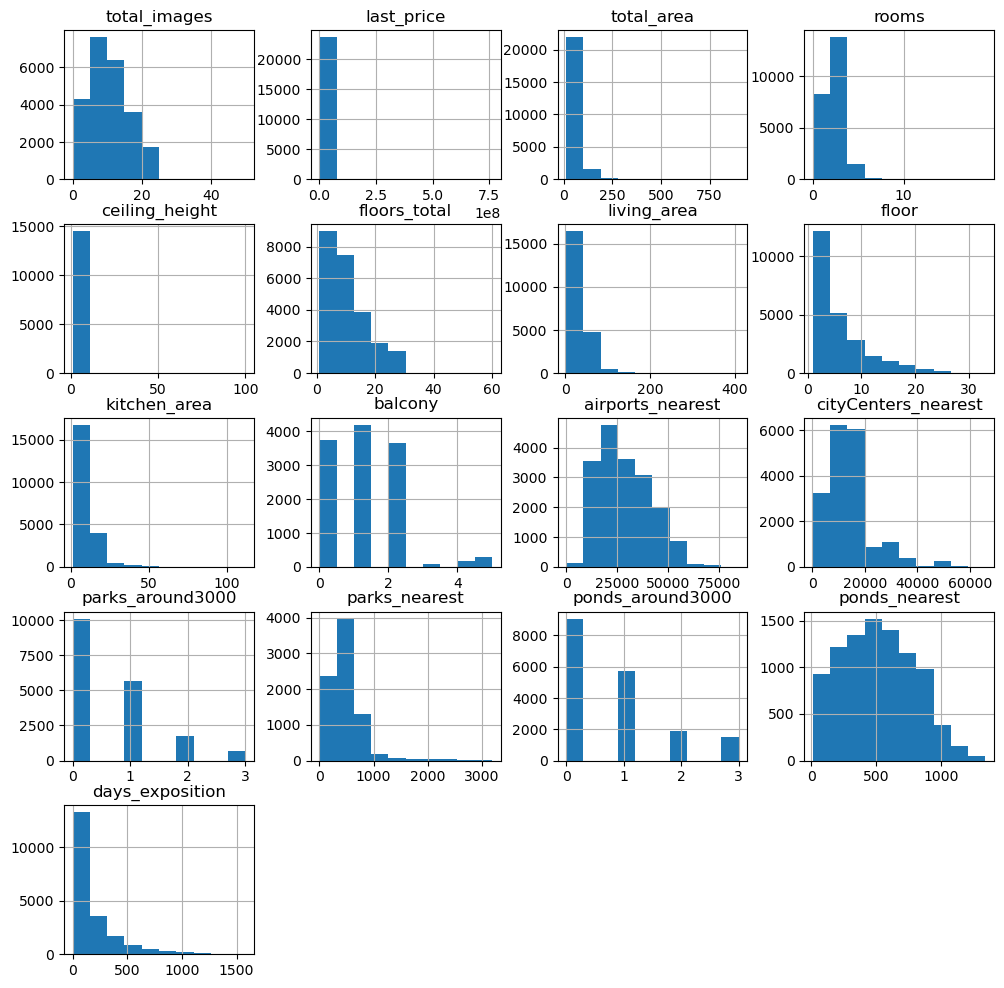

In [22]:
df.hist(figsize=(12, 12));

*At this stage, it is clear that the histograms are not completed. There are a lot of omissions in the data and incorrect formats are set.
Preprocessing is required.*

#### Основной вывод

### Data preprocessing

#### Clear the data from empty values

In [23]:
print('Output the fraction of missing values:\n', (df.isna().mean()*100).round(2))

Output the fraction of missing values:
 total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height          38.80
floors_total             0.36
living_area              8.03
floor                    0.00
is_apartment            88.29
studio                   0.00
open_plan                0.00
kitchen_area             9.61
balcony                 48.61
locality_name            0.21
airports_nearest        23.38
cityCenters_nearest     23.29
parks_around3000        23.28
parks_nearest           65.91
ponds_around3000        23.28
ponds_nearest           61.56
days_exposition         13.42
dtype: float64


In [24]:
# in the is_apartment column, omissions are most common
# the is_apartment column should logically take a Boolean value. Either it's an apartment, or it's not.
# Replace the pass with the highest frequency value (in our case)
app = df['is_apartment'].mode()
df['is_apartment'] = df['is_apartment'].fillna(app)

# next comes the balcony column - the number of balconies. If Nan occurs in a column, it is likely that there is simply no column.
# We can replace it with 0
df['balcony'] = df['balcony'].fillna(0)

In [25]:
# next comes the information about the height of the ceilings. Since the ceiling height cannot be zero, it is proposed to study the data
print(df['ceiling_height'].describe()) 

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


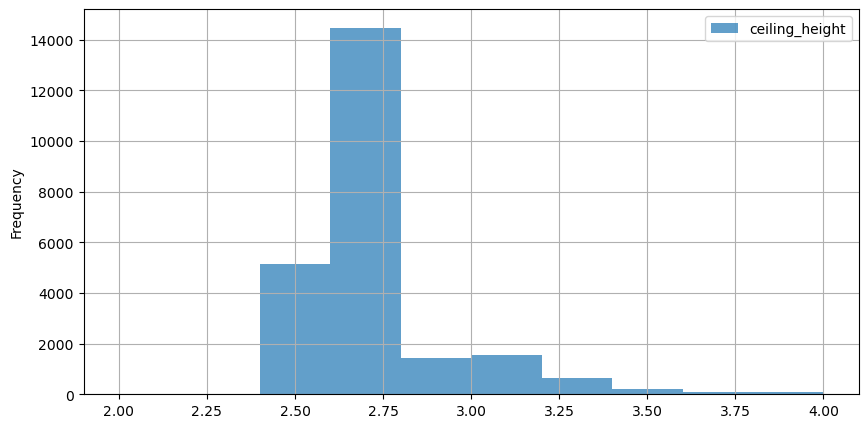

In [26]:
# if we replace Nan with the median height value, then the data will remain correct
median_hight = df['ceiling_height'].median() 

df['ceiling_height'] = df['ceiling_height'].fillna(median_hight) 

df['ceiling_height'].plot(
    kind='hist',
    legend=True,
    alpha=0.7,
    grid=True,
    figsize=(10, 5),
    range=(2, 4));

#### Data cleaning, conclusions

Columns that have been modified:

    1) is_apartment - boolean value (if Nan = 0)
    2) balcony - if the balcony is not specified, it is likely that it does not exist
    3) ceiling_height - ceiling height is standard in most cases

Columns that were decided not to edit and the reasons why:

    1) parks_nearest - it is impossible to determine whether there is parking near the object or not
    2) ponds_nearest - it is impossible to determine whether there is a pond near the object or not
    3) airports_nearest - it is impossible to determine whether there is an airport near the object or not
    4) cityCenters_nearest - it is impossible to determine the distance to the center without having an exact address
    5) Ponds_around3000 - it is likely that if this indicator is not specified, there is no parking within a radius of 3000m, it is convenient to leave Nan
    6) parks_around3000 - it is likely that if this indicator is not specified, there is no parking within a radius of 3000m, it is convenient to leave Nan
    7) kitchen_area - the kitchen area is floating, different for each case
    8) living_area - the living space depends on the workload in the apartment, it is individual
    9) floors_total - the number of floors in the house, it would be possible to predict having an exact address and a large sample
    10) locality_name - it is impossible to determine the location where the apartment is for sale without additional data

Potential causes of omissions:

    1) The data was filled in incorrectly and then deleted when uploading to the database;
    2) Failures on the DBMS side;
    3) Not all data was filled in by people when the ad was published;

#### Changing Data Types

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2776 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

*In the columns first_day_exposition, is_apartment, the data format does not correspond to what is expected. let's fix it*

In [28]:
df['floors_total'] = df['floors_total'].astype('int64', errors='ignore') 
df['is_apartment'] = df['is_apartment'].astype('bool') 
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [29]:
float64_cols = list(df.select_dtypes(include='float64'))
df[float64_cols] = df[float64_cols].astype('float32')

int64_cols = list(df.select_dtypes(include='int64'))
df[int64_cols] = df[int64_cols].astype('int32')

#### Data type conversion, conclusions

Conversion of data types was performed in columns: 

    1) is_apartament - the data type has been replaced with a Boolean one in order to filter the data correctly in the future
    2) first_day_exposition - the data type has been replaced with the date format, so that in the future it will be possible to build statistics in dynamics
    3) Data from float64 and int64 were transferred to float32 and int32
    
It was necessary to transform data types in order to build more correct analytics in the future.

#### Elimination of implicit duplicates

In [30]:
# before identifying duplicates. we will reduce all values to lowercase
df['locality_name'] = df['locality_name'].str.lower()
print(df['locality_name'].value_counts().head(25)) # show top 25 values

values = df['locality_name'].unique()
print('\n Number of unique values', len(values))

print('\n Output the first 50 unique values:', values[:50])

locality_name
санкт-петербург            15721
посёлок мурино               522
посёлок шушары               440
всеволожск                   398
пушкин                       369
колпино                      338
посёлок парголово            327
гатчина                      307
деревня кудрово              299
выборг                       237
петергоф                     201
сестрорецк                   183
красное село                 178
кудрово                      173
деревня новое девяткино      144
сертолово                    142
ломоносов                    133
кириши                       125
сланцы                       112
волхов                       111
тосно                        104
кингисепп                    104
кронштадт                     96
никольское                    93
коммунар                      89
Name: count, dtype: int64

 Number of unique values 365

 Output the first 50 unique values: ['санкт-петербург' 'посёлок шушары' 'городской посёлок янино-1'
 'по

Identification of duplicate values that require clarification:

**Below is the Russian text, since the original words are in Russian. This project part is not subject to translation**

    1) ё и е  
    2) поселок городского типа и городской поселок
    3) садоводческое некоммерческое товарищество и садовое товарищество
    4) поселок станции и поселок при железнодорожной станции
   

In [33]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е') 

In [35]:
to_replace = {
     r'(\b)поселок городского типа(\b)':r'\1городской поселок\2',
     r'(\b)поселок при железнодорожной станции(\b)':r'\1поселок станции\2',
     r'(\b)садоводческое некоммерческое товарищество(\b)':r'\1садовое товарищество\2'
}

df['locality_name'] = df['locality_name'].replace(to_replace, regex=True)
qty_new = len(df['locality_name'].unique()) 

#### To completely clear outliers and errors, it is proposed to categorize the data

In [37]:
def categorisation(row):
    '''
    Function to delete immplict duplicates
    '''
    name = row['locality_name']
    name = str(name)
    
    if 'город' in name:
        return 'Поселок городского типа'
    
    if ('санкт-' in name) | ('спб' in name):
        return 'Спб'
    
    if ('посе' in name) | ('посeлок ' in name): 
        return 'Поселок'
    
    if 'станции' in name:
        return 'Поселок станции'
    
    if 'садо' in name:
        return 'СНТ'
    
    if 'село' in name:
        return 'Село'
    
    if 'деревн' in name:
        return 'Деревня'
    
    if 'соснов' in name:
        return 'Сосновый бор'
    
    return 'тип населенного пункта неизвестен'

df['category'] = df.apply(categorisation, axis=1)

df.groupby('category')['category'].count()

category
Деревня                                945
Поселок                               2104
Поселок городского типа                584
СНТ                                      5
Село                                   210
Сосновый бор                            87
Спб                                  15721
тип населенного пункта неизвестен     4043
Name: category, dtype: int64

#### Finding anomalous values in data

In [42]:
column_list_float = df.select_dtypes('float32').columns

# Convert all the selected columns to a string type
df[column_list_float] = df[column_list_float].astype(str)

# Remove all characters except numbers and dots and replace empty strings with NaN
df[column_list_float] = df[column_list_float].replace(r'[^\d.]', '', regex=True).apply(pd.to_numeric, errors='coerce')

In [43]:
df.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699,23699.000000,23699.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2017-11-08 21:55:18.975484160,2.070636,2.724358,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
min,0.000000,1.219000e+04,12.000000,2014-11-27 00:00:00,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,2017-05-12 12:00:00,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2017-12-12 00:00:00,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,2018-08-26 00:00:00,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,2019-05-03 00:00:00,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.682529,1.088701e+07,35.654083,NaN,1.078405,0.988298,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988


*The following columns require additional analytics: ceiling_height, last_price and living_area*

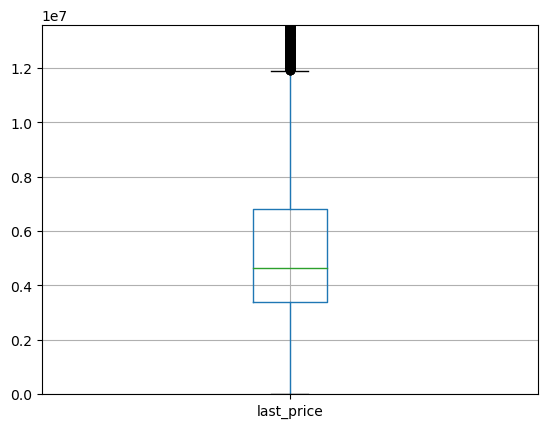

In [44]:
max_good_value = df['last_price'].quantile(0.75) * 2
df.boxplot(column='last_price')

normal_mean = df['last_price'].quantile(0.75) * 1.5
plt.ylim(top=max_good_value)
plt.ylim(bottom=0)

df = df.query('last_price < @normal_mean')

In [45]:
df.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,21010.000000,2.101000e+04,21010.000000,21010,21010.000000,21010.000000,20939.000000,19378.000000,21010.00000,18990.000000,21010.000000,15521.000000,15533.000000,15533.000000,6375.000000,15533.000000,7387.000000,18505.000000
mean,9.631794,4.657343e+06,52.158401,2017-11-16 02:46:41.180390400,1.901666,2.693826,10.732413,29.918355,5.86673,9.454487,0.587387,28980.630952,15203.548188,0.547480,487.492863,0.695294,533.102883,171.126506
min,0.000000,1.219000e+04,12.000000,2014-11-27 00:00:00,0.000000,1.000000,1.000000,2.000000,1.00000,1.300000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,16.000000,1.000000
25%,6.000000,3.300000e+06,38.700000,2017-05-21 06:00:00,1.000000,2.600000,5.000000,18.000000,2.00000,7.000000,0.000000,18012.000000,10842.000000,0.000000,290.500000,0.000000,318.000000,43.000000
50%,9.000000,4.350000e+06,48.100000,2017-12-16 00:00:00,2.000000,2.650000,9.000000,29.000000,4.00000,9.000000,0.000000,27154.000000,13783.000000,0.000000,456.000000,0.000000,522.000000,91.000000
75%,13.000000,5.800000e+06,62.000000,2018-08-27 00:00:00,3.000000,2.650000,16.000000,38.600000,8.00000,11.000000,1.000000,37847.000000,16806.000000,1.000000,613.000000,1.000000,741.000000,217.000000
max,39.000000,1.019800e+07,201.500000,2019-05-03 00:00:00,7.000000,32.000000,60.000000,112.000000,33.00000,64.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.507729,1.976841e+06,17.847716,NaN,0.895056,0.792861,6.624004,12.817298,4.90114,3.647818,0.929677,13071.004587,8551.897091,0.758344,322.907613,0.880177,277.083928,208.800831


After cleaning of very expensive apartments, the data became more correct.
We will also clear the data from apartments with extremely high ceilings

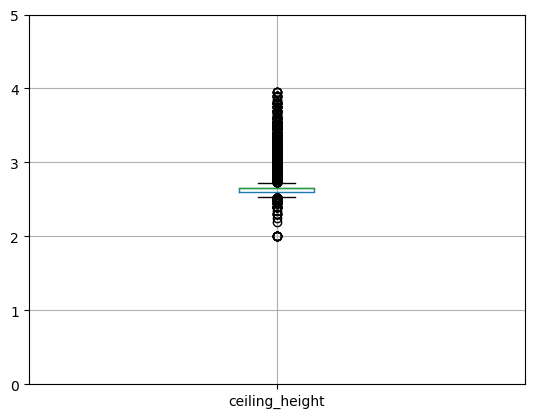

In [48]:
df.boxplot(column='ceiling_height') # we will leave only those apartments whose ceiling height is less than 30 meters
plt.ylim(top=5)
plt.ylim(bottom=0) 
plt.show()

*let's get rid of apartments where the ceilings are higher than 3 meters and less than 2*

In [49]:
max_for_ceilling = df['ceiling_height'].quantile(0.75) * 1.5
df = df.query('ceiling_height <= @max_for_ceilling')
df = df.query('ceiling_height >= 2')

*A similar method is applicable for kitchen_area*

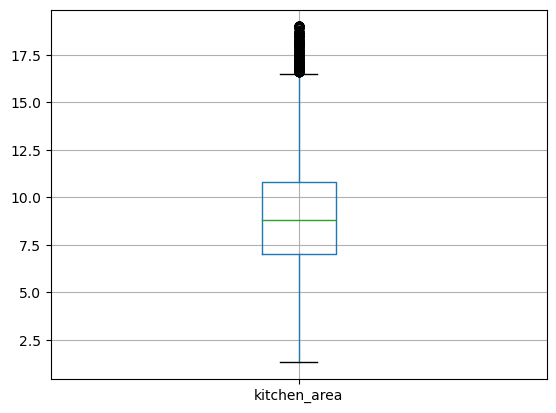

In [52]:
df.boxplot(column='kitchen_area') 
plt.show()

In [53]:
max_for_kitchen = df['kitchen_area'].quantile(0.75) *1.5
df = df.query('kitchen_area <= 19')

In [54]:
df.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,18525.000000,1.852500e+04,18525.000000,18525,18525.000000,18525.000000,18496.000000,18190.000000,18525.000000,18525.000000,18525.000000,13850.00000,13861.000000,13861.000000,5670.000000,13861.000000,6475.000000,16229.000000
mean,9.803671,4.661131e+06,52.216920,2017-11-14 04:34:47.125506048,1.923239,2.662559,10.607807,30.040394,5.812632,9.126410,0.618677,29008.94917,15297.574995,0.543900,484.538624,0.681264,534.874749,175.281163
min,0.000000,4.300000e+05,14.000000,2014-11-27 00:00:00,1.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.00000,208.000000,0.000000,1.000000,0.000000,16.000000,1.000000
25%,6.000000,3.300000e+06,39.000000,2017-05-14 00:00:00,1.000000,2.570000,5.000000,18.000000,2.000000,7.000000,0.000000,17905.50000,10910.000000,0.000000,291.000000,0.000000,319.000000,43.000000
50%,9.000000,4.350000e+06,48.300000,2017-12-08 00:00:00,2.000000,2.650000,9.000000,29.000000,4.000000,8.800000,0.000000,27267.00000,13821.000000,0.000000,456.000000,0.000000,523.000000,96.000000
75%,14.000000,5.800000e+06,62.000000,2018-09-04 00:00:00,3.000000,2.650000,15.000000,39.000000,8.000000,10.800000,1.000000,37948.00000,16804.000000,1.000000,612.000000,1.000000,745.500000,224.000000
max,39.000000,1.019800e+07,190.000000,2019-05-03 00:00:00,6.000000,3.950000,60.000000,112.000000,33.000000,19.000000,5.000000,84869.00000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.478768,1.933936e+06,17.215398,NaN,0.878030,0.163141,6.511400,12.689010,4.815595,2.839111,0.942653,13103.14387,8579.220594,0.755286,318.441959,0.873856,276.523835,211.293719


<AxesSubplot:>

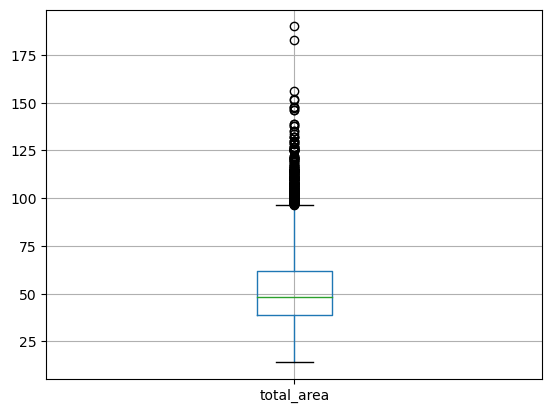

In [55]:
df.boxplot(column='total_area') # for the final stage, we will clear the data from emissions by the total number of square meters

*We will also get rid of abnormally large apartments by area*

In [56]:
max_for_area = df['total_area'].quantile(0.75) *1.5
df = df.query('total_area <= @max_for_area')

In [57]:
df.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,18081.000000,1.808100e+04,18081.000000,18081,18081.000000,18081.000000,18054.000000,17757.000000,18081.000000,18081.000000,18081.000000,13465.000000,13476.000000,13476.000000,5489.000000,13476.000000,6249.000000,15865.000000
mean,9.797965,4.580737e+06,50.922570,2017-11-16 20:26:47.964161280,1.881091,2.658495,10.631605,29.205718,5.826779,9.037894,0.621205,29060.810843,15354.948724,0.539997,485.253416,0.672752,535.216035,172.882446
min,0.000000,4.300000e+05,14.000000,2014-11-27 00:00:00,1.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,16.000000,1.000000
25%,6.000000,3.300000e+06,38.840000,2017-05-17 00:00:00,1.000000,2.560000,5.000000,18.000000,2.000000,7.000000,0.000000,17822.000000,10996.750000,0.000000,290.000000,0.000000,319.000000,42.000000
50%,9.000000,4.300000e+06,47.800000,2017-12-11 00:00:00,2.000000,2.650000,9.000000,28.800000,4.000000,8.630000,0.000000,27483.000000,13839.500000,0.000000,456.000000,0.000000,523.000000,94.000000
75%,14.000000,5.650000e+06,61.000000,2018-09-06 00:00:00,2.000000,2.650000,15.000000,37.700000,8.000000,10.700000,1.000000,38171.000000,16802.000000,1.000000,612.000000,1.000000,746.000000,220.000000
max,39.000000,1.019720e+07,93.000000,2019-05-03 00:00:00,6.000000,3.950000,60.000000,77.000000,31.000000,19.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.465383,1.867396e+06,15.153263,NaN,0.836539,0.156844,6.504913,11.482621,4.815796,2.782470,0.937441,13156.980946,8500.943967,0.751569,320.657905,0.867763,276.480673,208.692899


In [59]:
 print('Total rows deleted:', data.shape[0] - df.shape[0])

Total rows deleted: 5618


#### Data preprocessing, conclusions

During data preprocessing, a number of errors in the data were identified:

    1) Missing values;
    2) changed data types;
    3) eliminated implicit duplicates;
    4) the data has been categorized;
    5) implicit duplicates have been eliminated in the data;
    6) the data has been cleared of abnormal values;
    7) the data has been cleared of outliers.
In total, 5678 rows were deleted. In order to understand how the fullness of the data has changed. It is proposed to carry out the operation again, which was at the initial stage.

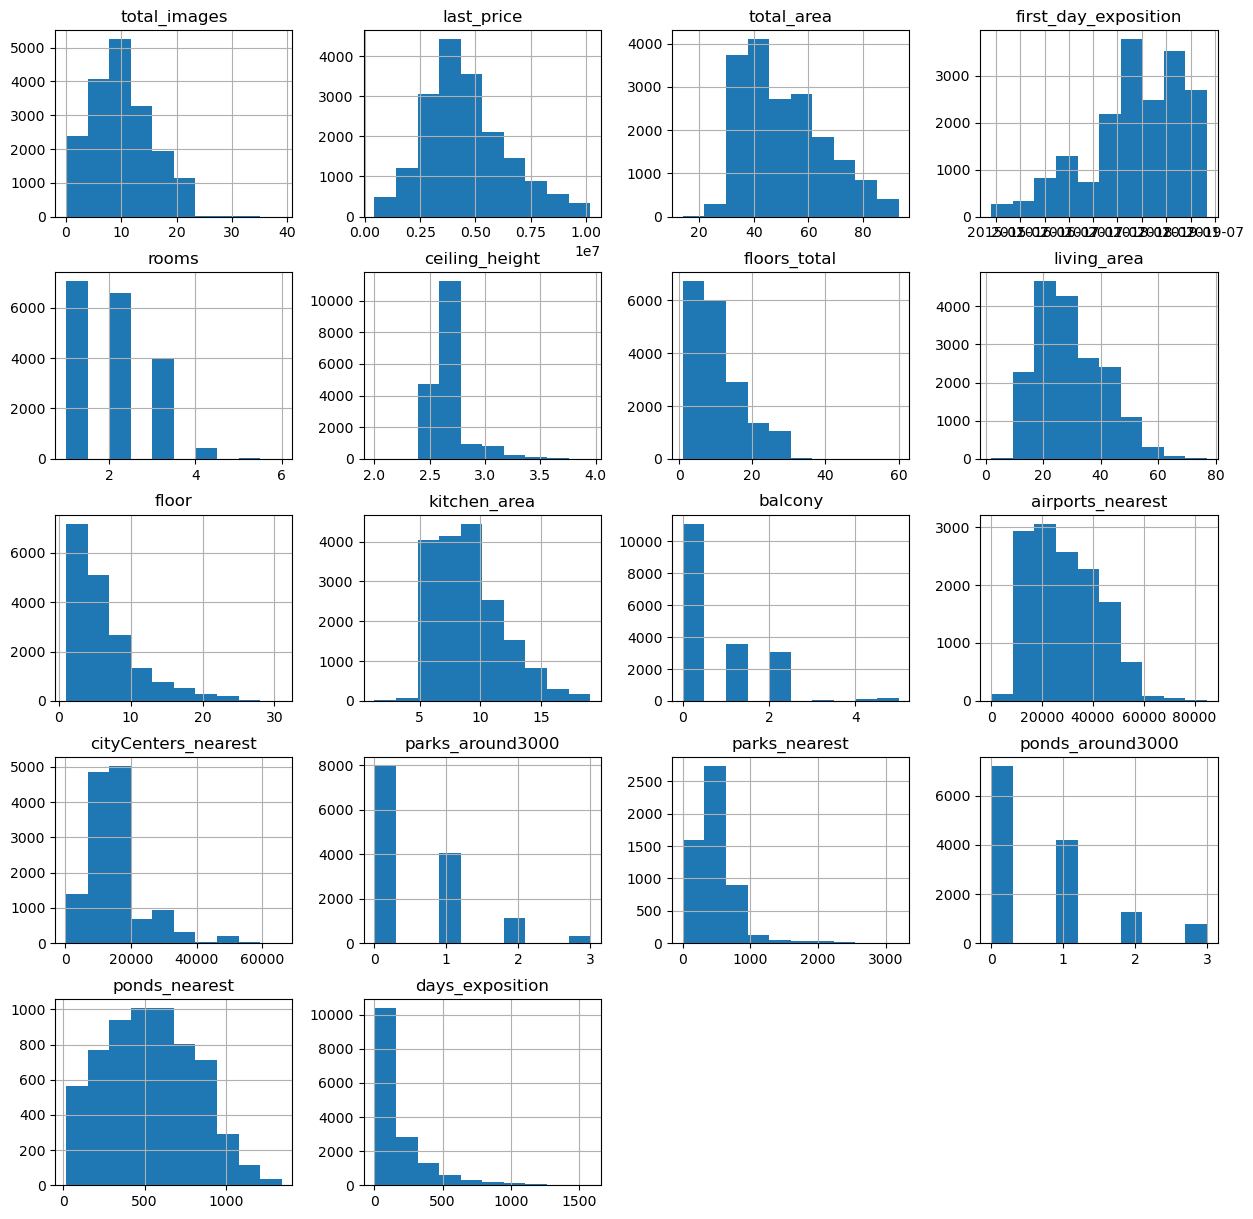

In [60]:
df.hist(figsize=(15, 15));

*Now all the data take adequate values. We can observe either normal distributions where data can be predicted, or a Poisson distribution. You can proceed to supplement the data with new values required for analysis.*

### Let's add the columns needed for analytics

In [61]:
# let's create a column that will determine the price of one square meter
df['price_m^2'] = df['last_price']  / df['total_area'] 

In [62]:
def type_floor(row):
    '''
    let's write a function that will substitute the floor type
    '''
    total_ = row['floors_total']
    current_ = row['floor']

    if total_ - current_ == 0:
        return "last floor"

    if total_ - current_ == total_-1:
        return "first floor"

    return "other"

df['type_floor'] = df.apply(type_floor, axis=1)

In [63]:
df['to_centr'] = df['cityCenters_nearest'] / 1000 

### Exploratory Data Analysis

#### Time of sale of apartments

Median value by number of days on sale: 94
Average time of sale of an apartment by number of days: 172.88
Extremely fast sales are those that were realized in less than : 28 days
Extremely long sales are those that were realized in less than : 330 days


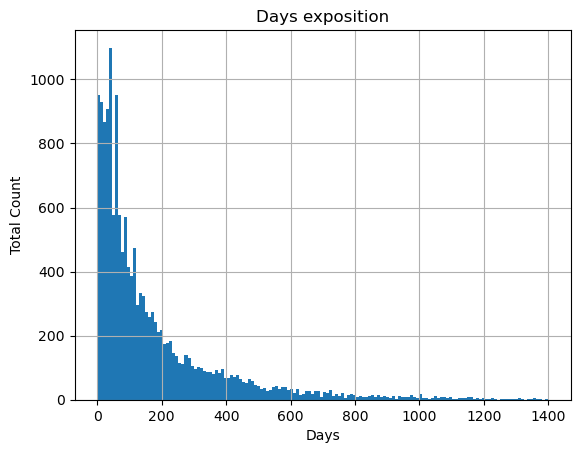

In [64]:
median = df['days_exposition'].median()
mean = df['days_exposition'].mean().round(2) 
q1 = df['days_exposition'].quantile(0.25) / 1.5
q2 = df['days_exposition'].quantile(0.75) * 1.5

df.hist(column = 'days_exposition', bins=150, range=(0, 1400)) 
plt.title("Days exposition")
plt.xlabel("Days")
plt.ylabel("Total Count")

print('Median value by number of days on sale:', int(median))
print('Average time of sale of an apartment by number of days:', mean)
print('Extremely fast sales are those that were realized in less than :', int(q1), 'days')
print('Extremely long sales are those that were realized in less than :', int(q2), 'days')

Based on the data described above, the average apartment is sold in 172 days. If we take the median, then most apartments are sold in 94 days.

All sales that are carried out faster than in a month can be considered extremely fast, and all sales carried out in more than 330 days can be considered extremely long.

#### Influence of factors on the total cost of the object

In [65]:
df[['last_price', 'total_area', 'kitchen_area', 'rooms', 'to_centr']].corr()[0:1]

,last_price,total_area,kitchen_area,rooms,to_centr
last_price,1.0,0.6359,0.430042,0.386075,-0.340845


Pearson correlation showed that the factors influencing the cost:

    1) Most of all, the cost of an apartment is affected by its area;
    2) the second most important indicator is the kitchen area;
    3) Next comes the number of rooms;
    4) The smallest (within the sample), but a strong influence on the cost is the distance to the center.
    
If we are talking about the first 3 indicators, then we can see a direct correlation. In the case of the distance to the center, the inverse correlation is visible. Which is very logical. The further away from the center, the cheaper.

*Let's study how the type of floor affects the final price:*

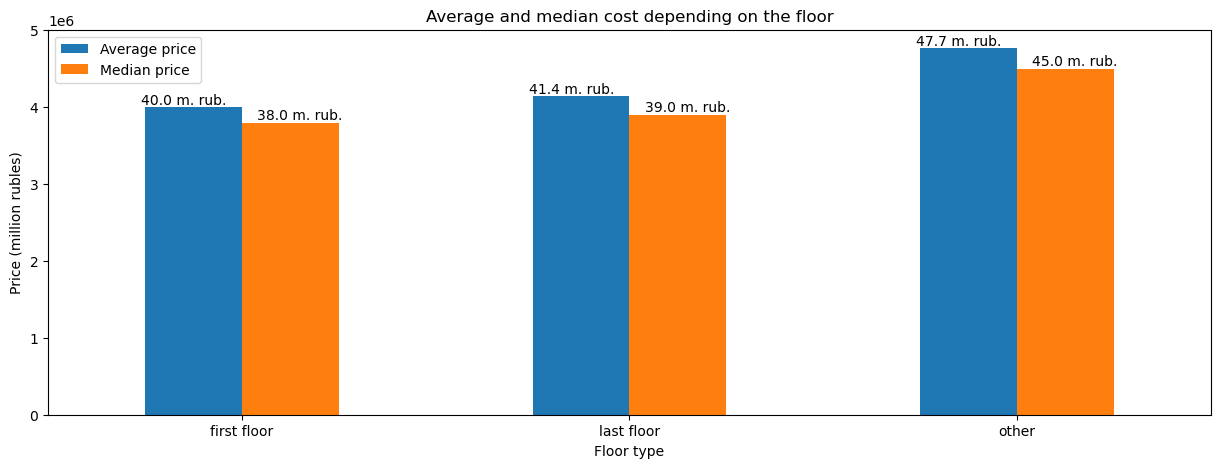

In [68]:
df_grouped_by_floor = df.pivot_table(index='type_floor',
                                     values='last_price',
                                     aggfunc=['mean', 'median'])

ax = df_grouped_by_floor.plot(kind='bar', figsize=(15, 5))
plt.title('Average and median cost depending on the floor')
plt.xticks(range(len(df_grouped_by_floor)), df_grouped_by_floor.index, rotation=0)
plt.ylabel('Price (million rubles)')
plt.xlabel('Floor type')
plt.legend(['Average price', 'Median price'])

for i, v in enumerate(df_grouped_by_floor['mean']['last_price']):
    ax.annotate(f'{round(v/100_000, 1)} m. rub.', (i-0.15, v), ha='center', va='bottom', fontsize=10)

for i, v in enumerate(df_grouped_by_floor['median']['last_price']):
    ax.annotate(f'{round(v/100_000, 1)} m. rub.', (i+0.15, v), ha='center', va='bottom', fontsize=10)

plt.show()

*The cheapest apartments are on the ground floor. And not on the first and not on the last - the most expensive. Which is very logical. Let's study how seasonality affects the cost of apartments:*

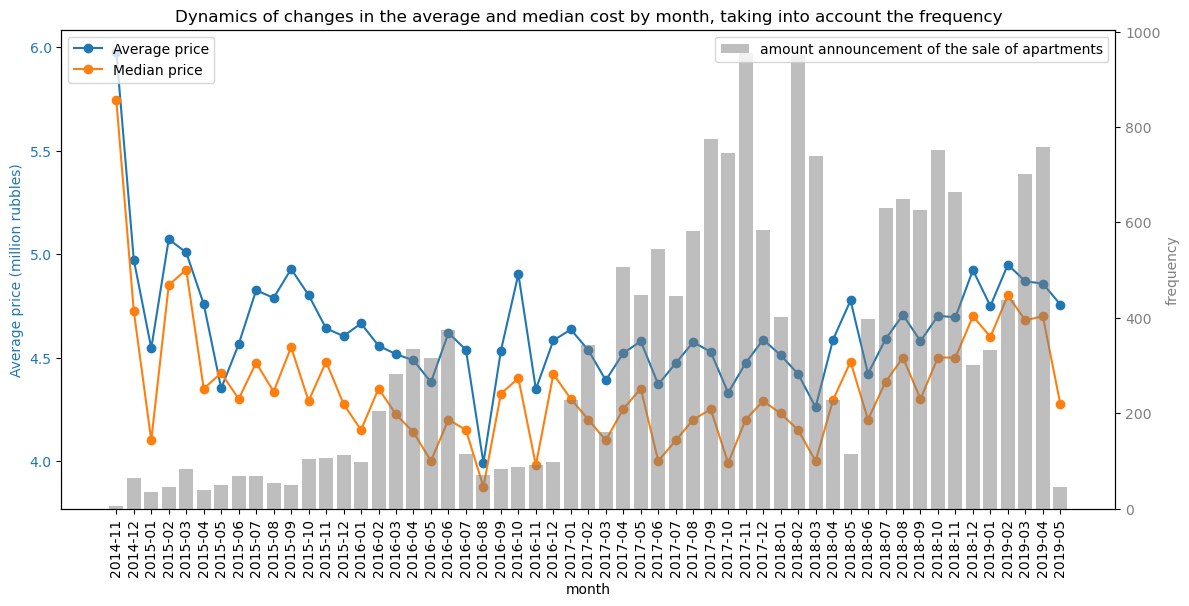

In [70]:
# We calculate the average and median cost, as well as the frequency by month
df_monthly_stats = df.groupby(df['first_day_exposition'].dt.to_period("M"))['last_price'].agg(['mean', 'median', 'count'])

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('month')
ax1.set_ylabel('Average price (million rubbles)', color=color)
ax1.plot(df_monthly_stats.index.astype(str), df_monthly_stats['mean']/1000000, marker='o', label='Average price', color=color)
ax1.plot(df_monthly_stats.index.astype(str), df_monthly_stats['median']/1000000, marker='o', label='Median price', color='tab:orange')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(df_monthly_stats.index.astype(str), rotation=90)
ax1.legend(loc='upper left')

ax2 = ax1.twinx() 
ax2.set_ylabel('frequency', color='tab:gray')  
ax2.bar(df_monthly_stats.index.astype(str), df_monthly_stats['count'], alpha=0.5, color='tab:gray', label='amount announcement of the sale of apartments')
ax2.tick_params(axis='y', labelcolor='tab:gray')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.title('Dynamics of changes in the average and median cost by month, taking into account the frequency')
plt.show()

*As we can see in our case, the average price has a certain seasonality, both in terms of prices and the number of ads.*

#### The average cost per square meter in 10 localities with the largest number of ads

In [74]:
list1=df['locality_name'].tolist()
list2= [] 

for to_split in list1:
    try:
        splited_words = to_split.split()
        list2.append(splited_words)
    except:
        continue

array_ = list(chain.from_iterable(list2))

counts = Counter(array_)
print(counts)

Counter({'санкт-петербург': 11360, 'поселок': 2270, 'деревня': 777, 'городской': 470, 'мурино': 468, 'шушары': 384, 'кудрово': 358, 'всеволожск': 336, 'колпино': 310, 'пушкин': 286, 'гатчина': 283, 'парголово': 280, 'выборг': 182, 'петергоф': 180, 'село': 179, 'красное': 153, 'сестрорецк': 138, 'новое': 129, 'девяткино': 129, 'сертолово': 125, 'ломоносов': 118, 'кириши': 106, 'волхов': 96, 'бугры': 96, 'сланцы': 95, 'тосно': 90, 'кронштадт': 85, 'коммунар': 81, 'бор': 78, 'кировск': 77, 'кингисепп': 72, 'отрадное': 71, 'сосновый': 69, 'старая': 64, 'металлострой': 63, 'никольское': 62, 'приозерск': 60, 'янино-1': 59, 'шлиссельбург': 54, 'имени': 47, 'стрельна': 41, 'луга': 40, 'тихвин': 39, 'романовка': 35, 'волосово': 35, 'кузьмоловский': 34, 'тельмана': 34, 'рощино': 32, 'свердлова': 32, 'павловск': 30, 'сиверский': 28, 'ивангород': 26, 'новый': 25, 'мга': 25, 'колпаны': 23, 'зеленогорск': 20, 'вырица': 20, 'новоселье': 20, 'свет': 19, 'вартемяги': 19, 'большая': 19, 'новогорелово': 

In [75]:
# if we apply a similar method with groupby, we will see that in fact the order of meeting values is different. 
# this means that there are lines that are either written differently (implicit duplicates) or shortened.
# For example, not "Murino village", but "Murino"
# Therefore, we will apply the method from above
df.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)

locality_name
санкт-петербург      11360
поселок мурино         442
поселок шушары         384
всеволожск             336
колпино                310
пушкин                 286
гатчина                283
поселок парголово      280
деревня кудрово        212
выборг                 182
Name: locality_name, dtype: int64

So, the regions that occur most often:

    1) 'санкт-петербург',
    2) 'мурино', 
    3) 'шушары', 
    4) 'кудрово',
    5) 'всеволожск',
    6) 'колпино',
    7) 'пушкин',
    8) 'гатчина',
    9) 'парголово',
    10)'выборг'

In [106]:
regions = ['санкт-петербург', 'мурино', 'шушары', 'кудрово', 'всеволожск', 'колпино', 'пушкин', 'гатчина', 'парголово', 'выборг']
regions_full = [] 

for name in df['locality_name'].tolist():
    for reg in regions:
        if str(reg) in str(name):
            regions_full.append(reg)
            break
    else:
        regions_full.append('other')

In [107]:
df['target_region'] = regions_full

In [108]:
for_regions = df[df['target_region'].isin(regions_full)]

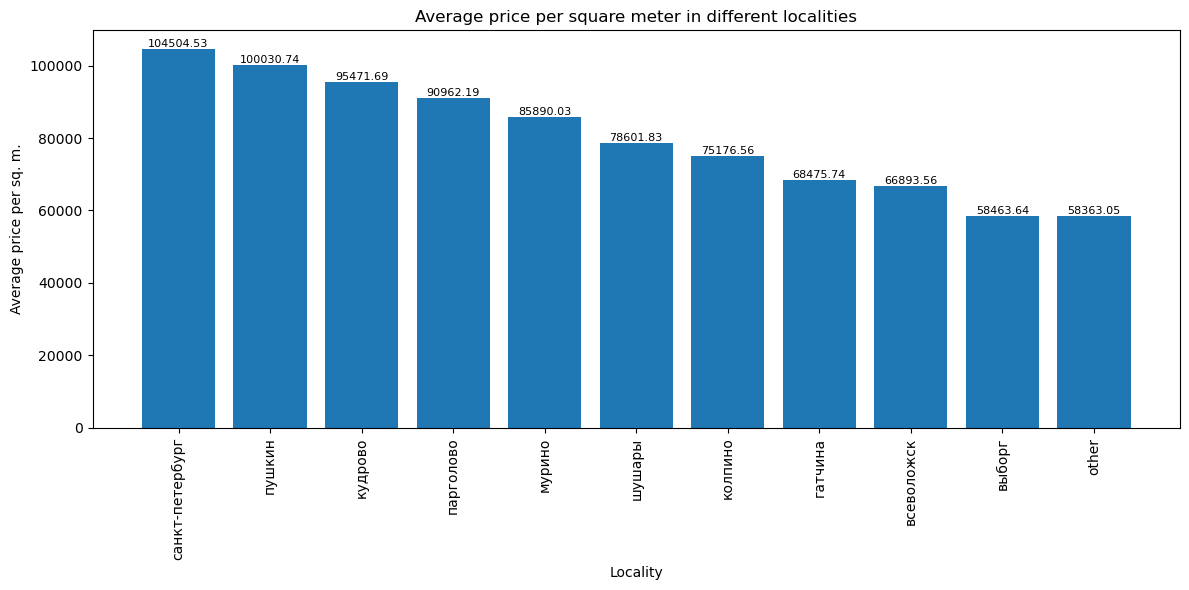

In [110]:
# Creating a summary table for the average price per square meter for each locality
region_stat = (for_regions.pivot_table(index='target_region', values='price_m^2', aggfunc='mean')
                .reset_index()
                .sort_values(by='price_m^2', ascending=False)
                .reset_index(drop=True))

plt.figure(figsize=(12, 6))
bars = plt.bar(region_stat['target_region'], region_stat['price_m^2'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

plt.xlabel('Locality')
plt.ylabel('Average price per sq. m.')
plt.title('Average price per square meter in different localities')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

The highest price per square meter in St. Petersburg
The lowest price in the settlement of Vyborg
As we can see, there are duplicates in the table in the form of "murino" and "Murino village", probably there are unidentified duplicates in the source data. Our research will not believe this at this stage, so let's ignore this fact.

#### Calculation of the cost of 1 kilometer from the center for St. Petersburg

Average price for approaching the center: 12838.66


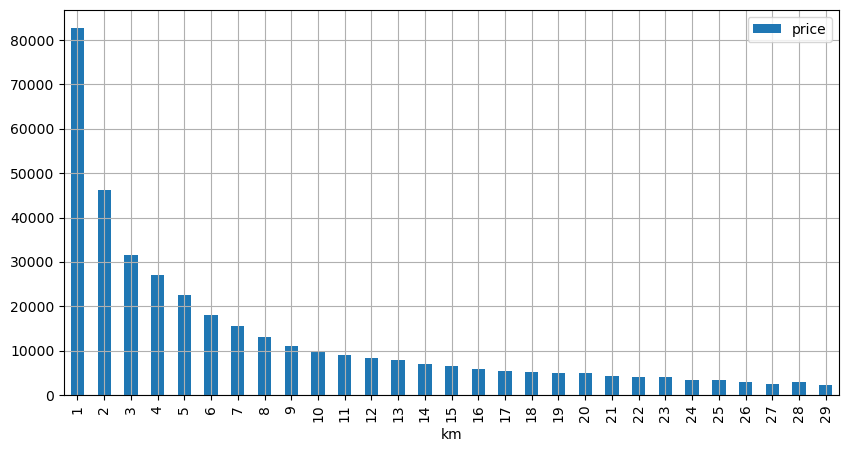

In [111]:
# Select apartments in Saint Petersburg with distance to the city center greater than 1 km
for_prices_per_km = df[['price_m^2', 'to_centr', 'category']].query('category in "Спб" and to_centr > 1') 
for_prices_per_km['to_centr'] = for_prices_per_km['to_centr'].astype('int')

# Assume that the weight of the cost of 1 km to the center in the cost per square kilometer of an apartment is 0.3 as correlation.
for_prices_per_km['price_m^2'] = for_prices_per_km['price_m^2']*0.3

# Divide the price by square meter
for_prices_per_km['prices'] = df['price_m^2'] / df['to_centr']

# Round and group the data
for_prices_per_km = for_prices_per_km.pivot_table(index='to_centr', values='prices', aggfunc='mean').reset_index()
for_prices_per_km.columns = ['km', 'price']

# Plot the data
for_prices_per_km.plot(x='km', y='price', kind='bar', figsize=(10,5), grid=True)
print('Average price for approaching the center:', for_prices_per_km['price'].mean().round(2))

On average, to get closer to the city center, an additional payment of 12838.66 rubles per square meter of the apartment is required. However, as the distance to the center decreases, the cost per kilometer increases. For example, when changing from 10 to 9 kilometers, we observe a difference of around a thousand rubles, while approaching from 2 kilometers to 1 kilometer results in a difference of more than 40 thousand rubles!

### General Conclusion
The data analysis task was decomposed into 3 main blocks.

    Block 1: Data preprocessing.
    Block 2: Calculation and addition of new columns required for analysis.
    Block 3: Exploratory data analysis.
The data preprocessing block consisted of 5 main parts:

    1. Data cleansing from empty values. Empty values were removed where possible, replaced with two types: logical and assumption-based. Logical changes, for example, pertained to columns like 'is_apartment' and 'balcony' – it was decided that if the data is missing, it implies non-apartment or no balcony, and these were replaced with 0. Regarding assumption-based data filling, a decision was made to study certain columns in detail and replace their missing values with the median. This applied to columns like 'ceiling_height' and 'days_exposition'.

    2. Data type conversion. In this block, it was necessary to change the data type in certain columns, for example, converting data from the 'first_day_exposition' column to date format or converting data from the 'is_apartment' column to boolean format.

    3. The next step in preprocessing was removing implicit duplicates. During this stage, changes were made such as replacing 'ё' with 'е' and combining similar location types, e.g., "поселок городского типа" and "городской поселок," or "поселок станции" and "поселок при железнодорожной станции."

    4. A decision was made to introduce additional data categorization for easier handling. All data was divided into several types based on location: "Спб" (Saint Petersburg), "Поселок" (Settlement), "Поселок городского типа" (Urban-type settlement), etc.

    5. Anomalies were identified by searching for anomalous values. Anomaly cleaning was a two-step process. First, it was decided to clean the data from anomalous values (remove all characters except digits and dots), followed by a more detailed analysis of the most controversial columns. The method for selecting anomalous values was based on boxplot logic; if the data exceeded the upper or lower whiskers (i.e., one and a half quartiles), such rows were removed. This method was applied to the columns 'ceiling_height,' 'last_price,' and 'living_area.'

The block for adding new columns:

    1. In this block, it was necessary to add several columns: price per square meter, distance to the center.
    Additional checks were conducted on the added columns, and no errors were identified.
    The block for exploratory data analysis:

    2. The first step was to study the column storing information about the duration of apartment sales. It was found that the median time for selling an apartment is 94 days. Apartments that were sold for more than 330 days can be considered unusually long, while sales completed in less than 28 days are considered very fast.

    3. The influence of various factors on the apartment price was then studied. The total area of the apartment has the most significant impact on the price, followed by kitchen area and the number of rooms. Distance to the center has a negative correlation. The floor type also affects the price, although its correlation cannot be precisely calculated. However, it can be said that the price for the first floor will be the lowest, and for the last floor, it will be higher than the first but lower than for all others. Dates of placement do not affect the price.

    4. An investigation was conducted into the average price per square meter for the top 10 regions with the highest number of ads in the presented sample. The highest price per square meter was in Saint Petersburg, while the lowest was in Vyborg.

    5. The final stage of the study involved examining the average price for each kilometer to the center in apartments in Saint Petersburg. The price per square meter was taken as the basis. The average cost to approach the center by 1 km is approximately 12838.66 rubles.






